<a href="https://colab.research.google.com/github/shwetamate24/AI-ML/blob/main/ShapeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

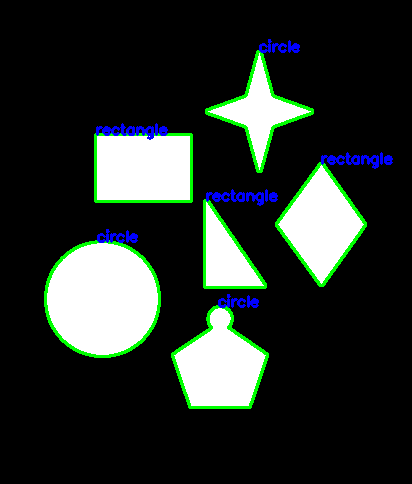

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/s2.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through each contour and detect the shape
for contour in contours:
    # Get the area and perimeter of the contour
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Approximate the contour to a polygon
    approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)

    # Determine the shape based on the number of vertices
    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        # Check if it's a square or rectangle based on aspect ratio
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
            shape = "square"
        else:
            shape = "rectangle"
    elif len(approx) == 5:
        shape = "pentagon"
    elif len(approx) == 6:
        shape = "hexagon"
    else:
        shape = "circle"

    # Draw the detected shape
    cv2.drawContours(img, [contour], 0, (0, 255, 0), 2)
    cv2.putText(img, shape, (contour[0][0][0], contour[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image with detected shapes
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
